![BTS](img/Logo-BTS.jpg)

# Session 14: Feature Engineering

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-11-16)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/14-Feature-Engineering.ipynb)

## Exercise 1: Feature engineering on grocery sales dataset

We will perform some feature engineering on the "Corporación Favorita Grocery Sales Forecasting" Kaggle competition dataset:

https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

You already have a sample to play with.

1. Load all the datasets, with attention to: dates, _unique_ indexes, numerical variables that are in fact categorical variables
2. Create a new column `is_countable` in `train_sample` that is `True` if the `unit_sales` field is always integer and `False` if it contains floats. _Tip: If you substract `values - values.astype(int)` and the result is always zero, you can consider `values` as integer_.
3. Create a new column `is_holiday` in `train_sample` and `transactions` that is `True` if the day is a weekend (**non working Saturday** or Sunday) or a non-transferred holiday and `False` otherwise.
4. There are `NaN` values in the `onpromotion` column. Try to fill them using some strategy better than the baseline: `NaN -> False`. Did you discover any products that could have been in promotion this way?
5. Look online for population and latitude/longitude data of each city to add new columns to the `stores` dataset. Is each city the capital of its state? 

In [1]:
import pandas as pd

In [46]:
train = pd.read_csv(
    "data/favorita/train_sample.csv",
    parse_dates=['date'],
    index_col='id',
    dtype={
        'store_nbr': object,
        'item_nbr': object,
    },
)
train['onpromotion'] = train['onpromotion'].replace({0.0: False, 1.0: True})
train.head()

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
4954,2013-01-02,5,105737,6.0,NaN
4958,2013-01-02,5,108698,1.0,NaN
4961,2013-01-02,5,108797,13.0,NaN
4963,2013-01-02,5,111223,14.0,NaN
4964,2013-01-02,5,112830,1.0,NaN


In [47]:
train["is_int"] = (train["unit_sales"] - train["unit_sales"].astype(int) == 0)

In [48]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,is_int
id,,,,,,
4954,2013-01-02,5,105737,6.0,NaN,True
4958,2013-01-02,5,108698,1.0,NaN,True
4961,2013-01-02,5,108797,13.0,NaN,True
4963,2013-01-02,5,111223,14.0,NaN,True
4964,2013-01-02,5,112830,1.0,NaN,True


In [49]:
pd.Series([True, True, False]).mean()

0.6666666666666666

In [50]:
is_countable = (train.groupby("item_nbr")["is_int"].mean() == 1.0)
is_countable.name = "is_countable"
is_countable.head()

item_nbr
1000866    True
1005463    True
1010755    True
1010757    True
1012473    True
Name: is_countable, dtype: bool

In [51]:
train = train.join(is_countable, on="item_nbr")

In [52]:
del train['is_int']

In [53]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,is_countable
id,,,,,,
4954,2013-01-02,5,105737,6.0,NaN,True
4958,2013-01-02,5,108698,1.0,NaN,True
4961,2013-01-02,5,108797,13.0,NaN,True
4963,2013-01-02,5,111223,14.0,NaN,True
4964,2013-01-02,5,112830,1.0,NaN,True


In [30]:
(train["is_countable"] == train["is_int"]).all()

False

In [61]:
items = pd.read_csv(
    "data/favorita/items.csv",
    index_col='item_nbr',
)
items.index = items.index.astype(str)
items.head()

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,0
99197,GROCERY I,1067,0
103501,CLEANING,3008,0
103520,GROCERY I,1028,0
103665,BREAD/BAKERY,2712,1


In [62]:
is_countable.head()

item_nbr
1000866    True
1005463    True
1010755    True
1010757    True
1012473    True
Name: is_countable, dtype: bool

In [63]:
is_countable.index

Index(['1000866', '1005463', '1010755', '1010757', '1012473', '1018617',
       '1021281', '1037845', '1037856', '1038937',
       ...
       '964753', '979196', '979553', '981655', '985824', '987768', '987769',
       '988459', '996122', '996537'],
      dtype='object', name='item_nbr', length=803)

In [64]:
items.index

Index(['96995', '99197', '103501', '103520', '103665', '105574', '105575',
       '105576', '105577', '105693',
       ...
       '2130553', '2131010', '2131572', '2131699', '2132163', '2132318',
       '2132945', '2132957', '2134058', '2134244'],
      dtype='object', name='item_nbr', length=4100)

In [67]:
available_items = items.join(is_countable).dropna()

In [69]:
available_items[available_items['is_countable'] == True]

,family,class,perishable,is_countable
item_nbr,,,,
105576,GROCERY I,1045,0,True
105737,GROCERY I,1044,0,True
108079,GROCERY I,1030,0,True
108698,DELI,2644,1,True
108797,GROCERY I,1004,0,True
108833,EGGS,2502,1,True
111223,GROCERY I,1034,0,True
112830,GROCERY I,1044,0,True
114778,GROCERY I,1016,0,True


In [68]:
available_items[available_items['is_countable'] == False]

,family,class,perishable,is_countable
item_nbr,,,,
208530,FROZEN FOODS,2226,0,False
311994,BREAD/BAKERY,2752,1,False
507354,DELI,2690,1,False
507958,POULTRY,2416,1,False
582863,MEATS,2302,1,False
582864,MEATS,2302,1,False
583795,MEATS,2302,1,False
584077,MEATS,2302,1,False
584123,MEATS,2302,1,False


In [31]:
train[train["is_countable"] != train["is_int"]]

,date,store_nbr,item_nbr,unit_sales,onpromotion,is_int,is_countable
id,,,,,,,
293062,2013-01-09,8,582863,20.0,NaN,True,False
424084,2013-01-12,28,584125,5.0,NaN,True,False
494024,2013-01-14,8,695758,17.0,NaN,True,False
739420,2013-01-20,12,820006,5.0,NaN,True,False
1129947,2013-01-29,50,582864,56.0,NaN,True,False
1749559,2013-02-13,50,311994,20.0,NaN,True,False
1772631,2013-02-14,27,695758,1.0,NaN,True,False
1773613,2013-02-14,28,903285,16.0,NaN,True,False
2046757,2013-02-21,5,582863,14.0,NaN,True,False


In [29]:
train[train['is_countable'] == False]

,date,store_nbr,item_nbr,unit_sales,onpromotion,is_int,is_countable
id,,,,,,,
5052,2013-01-02,5,208530,27.168,NaN,False,False
5164,2013-01-02,5,311994,48.917,NaN,False,False
5364,2013-01-02,5,507958,20.436,NaN,False,False
5456,2013-01-02,5,582863,10.303,NaN,False,False
5457,2013-01-02,5,582864,38.130,NaN,False,False
5459,2013-01-02,5,583795,6.755,NaN,False,False
5541,2013-01-02,5,699692,9.294,NaN,False,False
5687,2013-01-02,5,844019,4.575,NaN,False,False
5726,2013-01-02,5,871118,7.654,NaN,False,False


In [20]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,is_int
id,,,,,,
4954,2013-01-02,5,105737,6.0,NaN,True
4958,2013-01-02,5,108698,1.0,NaN,True
4961,2013-01-02,5,108797,13.0,NaN,True
4963,2013-01-02,5,111223,14.0,NaN,True
4964,2013-01-02,5,112830,1.0,NaN,True


In [16]:
train['is_countable'] = is_countable

In [17]:
train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,is_int,is_countable
id,,,,,,,
4954,2013-01-02,5,105737,6.0,NaN,True,NaN
4958,2013-01-02,5,108698,1.0,NaN,True,NaN
4961,2013-01-02,5,108797,13.0,NaN,True,NaN
4963,2013-01-02,5,111223,14.0,NaN,True,NaN
4964,2013-01-02,5,112830,1.0,NaN,True,NaN


In [5]:
train.head(30)

,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
4954,2013-01-02,5,105737,6.000,NaN
4958,2013-01-02,5,108698,1.000,NaN
4961,2013-01-02,5,108797,13.000,NaN
4963,2013-01-02,5,111223,14.000,NaN
4964,2013-01-02,5,112830,1.000,NaN
4965,2013-01-02,5,114790,47.000,NaN
4971,2013-01-02,5,115720,5.000,NaN
4972,2013-01-02,5,115847,2.000,NaN
4973,2013-01-02,5,115850,23.000,NaN


---

In [71]:
hols = pd.read_csv(
    "data/favorita/holidays_events.csv",
    parse_dates=['date'],
    index_col='date',
)
hols.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [73]:
hols['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [72]:
len(hols)

350

In [74]:
trans = pd.read_csv(
    "data/favorita/transactions.csv",
    parse_dates=['date'],
)
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [80]:
%matplotlib inline

In [83]:
hols[hols["type"] == "Work Day"].index.weekday.unique()

Int64Index([5], dtype='int64', name='date')

In [84]:
hols[hols["type"] == "Bridge"].index.weekday.unique()

Int64Index([0, 4], dtype='int64', name='date')

In [85]:
hols[hols["type"] == "Transfer"].index.weekday.unique()

Int64Index([4, 6, 0, 3], dtype='int64', name='date')

In [107]:
hols.index.day_name()

Index(['Friday', 'Sunday', 'Thursday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Monday', 'Monday', 'Monday',
       ...
       'Wednesday', 'Friday', 'Friday', 'Thursday', 'Friday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday'],
      dtype='object', name='date', length=350)

In [108]:
hols.index.weekday_name

Index(['Friday', 'Sunday', 'Thursday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Monday', 'Monday', 'Monday',
       ...
       'Wednesday', 'Friday', 'Friday', 'Thursday', 'Friday', 'Friday',
       'Saturday', 'Sunday', 'Monday', 'Tuesday'],
      dtype='object', name='date', length=350)

In [91]:
hols["weekday"] = hols.index.weekday
hols["weekday_name"] = hols.index.weekday_name

In [102]:
national_holidays = hols[hols['locale'] == 'National']

In [ ]:
nat

In [105]:
national_holidays[national_holidays.index.to_series().value_counts() > 1]

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-12-24,Bridge,National,Ecuador,Puente Navidad,False,0,Monday
2012-12-24,Additional,National,Ecuador,Navidad-1,False,0,Monday
2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False,0,Monday
2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False,0,Monday
2014-12-26,Bridge,National,Ecuador,Puente Navidad,False,4,Friday
2014-12-26,Additional,National,Ecuador,Navidad+1,False,4,Friday
2016-05-01,Holiday,National,Ecuador,Dia del Trabajo,False,6,Sunday
2016-05-01,Event,National,Ecuador,Terremoto Manabi+15,False,6,Sunday
2016-05-07,Additional,National,Ecuador,Dia de la Madre-1,False,5,Saturday


In [101]:
hols['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [92]:
hols[hols["description"] == "Independencia de Guayaquil"]

,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True,1,Tuesday
2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True,2,Wednesday
2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True,3,Thursday
2015-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False,4,Friday
2016-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False,6,Sunday
2017-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,False,0,Monday


In [100]:
hols[hols.index.to_series().value_counts() > 1]

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,0,Monday
2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,0,Monday
2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False,0,Monday
2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,1,Tuesday
2012-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1,Tuesday
2012-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False,5,Saturday
2012-12-22,Additional,National,Ecuador,Navidad-3,False,5,Saturday
2012-12-24,Bridge,National,Ecuador,Puente Navidad,False,0,Monday
2012-12-24,Additional,National,Ecuador,Navidad-1,False,0,Monday


In [94]:
hols.index.is_unique

False

In [93]:
hols[hols["type"] == "Transfer"]

,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday
2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday
2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday
2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False,4,Friday
2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False,6,Sunday
2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,4,Friday
2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False,0,Monday
2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False,3,Thursday
2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False,4,Friday


In [88]:
hols[hols["description"] == "Independencia de Guayaquil"].index.weekday

Int64Index([1, 2, 3, 4, 6, 0], dtype='int64', name='date')

In [112]:
(trans["date"].dt.day_name() == trans["date"].dt.weekday_name).all()

True

In [113]:
trans["date"].dt.weekday_name.unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

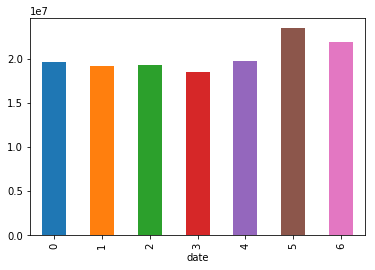

In [81]:
trans.groupby(trans["date"].dt.weekday)['transactions'].sum().plot.bar()

In [78]:
trans["date"].dt.weekday.unique()

array([1, 2, 3, 4, 5, 6, 0])

In [75]:
trans[trans['transactions'] == 0]

,date,store_nbr,transactions


In [117]:
hols.head()

,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False,4,Friday
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,6,Sunday
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False,3,Thursday
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False,5,Saturday
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,5,Saturday


In [120]:
# Wrong!
#trans.join(hols, on="date")

In [121]:
national_holidays.head()

,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,4,Friday
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True,1,Tuesday
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,4,Friday
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,5,Saturday


In [122]:
national_holidays.drop_duplicates?

In [125]:
unique_national_hols = national_holidays.reset_index().drop_duplicates("date").set_index("date")

In [128]:
unique_national_hols.index.is_unique

True

In [123]:
national_holidays[national_holidays.index.to_series().value_counts() > 1]

/home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-12-24,Bridge,National,Ecuador,Puente Navidad,False,0,Monday
2012-12-24,Additional,National,Ecuador,Navidad-1,False,0,Monday
2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False,0,Monday
2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False,0,Monday
2014-12-26,Bridge,National,Ecuador,Puente Navidad,False,4,Friday
2014-12-26,Additional,National,Ecuador,Navidad+1,False,4,Friday
2016-05-01,Holiday,National,Ecuador,Dia del Trabajo,False,6,Sunday
2016-05-01,Event,National,Ecuador,Terremoto Manabi+15,False,6,Sunday
2016-05-07,Additional,National,Ecuador,Dia de la Madre-1,False,5,Saturday


---

In [129]:
hols = pd.read_csv(
    "data/favorita/holidays_events.csv",
    parse_dates=['date'],
    index_col='date',
)
hols.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [131]:
national_holidays = hols[hols["locale"] == "National"]
national_holidays.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [143]:
unique_national_hols = national_holidays.reset_index().drop_duplicates("date").set_index("date")
unique_national_hols.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [144]:
unique_national_hols.index.is_unique

True

In [145]:
unique_national_hols["weekday"] = unique_national_hols.index.weekday
unique_national_hols["weekday_name"] = unique_national_hols.index.weekday_name

In [146]:
unique_national_hols.head()

,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,4,Friday
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True,1,Tuesday
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,4,Friday
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,5,Saturday


In [157]:
real_holidays = unique_national_hols[unique_national_hols["transferred"] == False].copy()
real_holidays.head()

,type,locale,locale_name,description,transferred,weekday,weekday_name
date,,,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,4,Friday
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,4,Friday
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,5,Saturday
2012-12-21,Additional,National,Ecuador,Navidad-4,False,4,Friday


In [158]:
real_holidays["type"].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [159]:
real_holidays["is_holiday"] = real_holidays["type"] != "Work Day"

In [161]:
real_holidays.head()

,type,locale,locale_name,description,transferred,weekday,weekday_name,is_holiday
date,,,,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,4,Friday,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,4,Friday,True
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,4,Friday,True
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,5,Saturday,True
2012-12-21,Additional,National,Ecuador,Navidad-4,False,4,Friday,True


In [169]:
trans["is_holiday_alt"] = trans["date"].isin(real_holidays[real_holidays["type"] != "Work Day"].index)

In [171]:
trans = trans.join(real_holidays["is_holiday"], on="date").fillna(False)
trans

,date,store_nbr,transactions,is_holiday_alt,is_holiday
0,2013-01-01,25,770,True,True
1,2013-01-02,1,2111,False,False
2,2013-01-02,2,2358,False,False
3,2013-01-02,3,3487,False,False
4,2013-01-02,4,1922,False,False
5,2013-01-02,5,1903,False,False
6,2013-01-02,6,2143,False,False
7,2013-01-02,7,1874,False,False
8,2013-01-02,8,3250,False,False
9,2013-01-02,9,2940,False,False


In [173]:
(trans["is_holiday_alt"] == trans["is_holiday"]).all()

True

In [155]:
trans.loc[trans["date"].dt.weekday < 5, 'is_holiday'] = False
trans.loc[trans["date"].dt.weekday >= 5, 'is_holiday'] = True
trans.head()

,date,store_nbr,transactions,is_holiday
0,2013-01-01,25,770,False
1,2013-01-02,1,2111,False
2,2013-01-02,2,2358,False
3,2013-01-02,3,3487,False
4,2013-01-02,4,1922,False


In [174]:
tables = pd.read_html("https://www.citypopulation.de/Ecuador-Cities.html")

In [175]:
tables[0]

,Unnamed: 0,Name,Abbr.,Capital,AreaA (km²),PopulationCensus (C)1990-11-25,PopulationCensus (Cf)2001-11-25,PopulationCensus (C)2010-11-28,PopulationProjection (P)2011-07-01,PopulationProjection (P)2018-07-01,Unnamed: 10,Unnamed: 11
0,NaN,Azuay,AZU,Cuenca,7995,506090,599546,712127,753500,853100,799500.0,→
1,NaN,Bolívar,BOL,Guaranda,3926,163149,169370,183641,193700,206800,392600.0,→
2,NaN,Cañar,CAN,Azogues,3142,189347,206981,225184,240200,272200,314200.0,→
3,NaN,Carchi,CAR,Tulcán,3750,141482,152939,164524,173400,184100,375000.0,→
4,NaN,Chimborazo,CHI,Riobamba,6470,366636,403632,458581,481500,515400,647000.0,→
5,NaN,Cotopaxi,COT,Latacunga,5985,286926,349540,409205,431200,476400,598500.0,→
6,NaN,El Oro,EOR,Machala,5817,412572,525763,600659,634500,698500,581700.0,→
7,NaN,Esmeraldas,ESM,Esmeraldas,16219,354936,430455,534092,561600,626600,1621900.0,→
8,NaN,Galápagos,GAL,Puerto Baquerizo Moreno,8010,9785,18640,25124,26600,31600,801000.0,→
9,NaN,Guayas,GUA,Guayaquil,16803,2345594,3070145,3645483,3840300,4267900,1680300.0,→


In [177]:
tables[1]

,Unnamed: 0,Name,Adm.,PopulationCensus (C)2010-11-28
0,1.0,Guayaquil,GUA,2278691.0
1,2.0,Quito,PIC,1607734.0
2,3.0,Cuenca,AZU,329928.0
3,4.0,Santo Domingo de los Colorados,SDT,270875.0
4,5.0,Machala,EOR,231260.0
5,6.0,Durán,GUA,230839.0
6,7.0,Manta,MAN,217553.0
7,8.0,Portoviejo,MAN,206682.0
8,NaN,NaN,NaN,NaN


In [179]:
tables[2].columns

Index(['Unnamed: 0', 'Name', 'Adm.', 'PopulationCensus (C)1982-11-28',
       'PopulationCensus (C)1990-11-25', 'PopulationCensus (Cf)2001-11-25',
       'PopulationCensus (C)2010-11-28', 'Area', 'Unnamed: 8'],
      dtype='object')

In [182]:
tables[2].iat[0, -1]

'→'

In [178]:
tables[2]

,Unnamed: 0,Name,Adm.,PopulationCensus (C)1982-11-28,PopulationCensus (C)1990-11-25,PopulationCensus (Cf)2001-11-25,PopulationCensus (C)2010-11-28,Area,Unnamed: 8
0,NaN,Ambato,TUN,100454,124166,154095,165185.0,2700.0,→
1,NaN,Arenillas,EOR,9198,10999,14318,17346.0,0.0,→
2,NaN,Atacames,ESM,...,...,9783,15463.0,0.0,→
3,NaN,Atuntaqui (Antonio Ante),IMB,12247,13764,17775,21286.0,0.0,→
4,NaN,Azogues,CAN,14548,21060,27866,33848.0,0.0,→
5,NaN,Babahoyo,LRI,42266,50285,76869,90191.0,0.0,→
6,NaN,Bahía de Caráquez (Sucre),MAN,...,15308,19703,20921.0,0.0,→
7,NaN,Balzar,GUA,17627,21721,24280,28794.0,0.0,→
8,NaN,Baños de Agua Santa,TUN,8340,9501,10439,12995.0,0.0,→
9,NaN,Buena Fé (San Jacinto de Buena Fé),LRI,...,...,27516,38263.0,0.0,→
